# Performance plots for Gaia FGK benchmark stars

## Author(s): Sven Buder (SB, WG4)

### History:
180926 SB Created

In [1]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import sys
import glob
import pickle
import pandas

# Packages to work with FITS and (IDL) SME.out files
import astropy.io.fits as pyfits
import astropy.table as table
from astropy.table import Table
from scipy.io.idl import readsav

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [2]:
# Some other useful dictionaries

kwargs_scatter_black = dict(
    alpha=0.05,
    s = 1,
    rasterized = True)
kwargs_scatter = dict(
    cmap = parula, 
    s = 15,
    rasterized = True)
kwargs_hist = dict(
    c = 'C0',
    lw=5
    )
tex_dict = dict(
    teff  =r'$T_\mathrm{eff}$',
    logg  =r'$\log g$',
    fe_h  =r'$\mathrm{[Fe/H]}$',
    bp_rp =r'$\mathrm{BP} - \mathrm{RP}$',
    M_G   =r'$\mathrm{M_G}$'
    )

In [3]:
# 
gbs = Table.read('data/GALAH_GBS2.1.fits',1)
gbs_raw = Table.read('data/GBS2.1.fits',1)

In [4]:
galah = Table.read('../../../catalogs/GALAH_DR3_main.fits',1)

In [5]:
gbs_galah_match = []
galah_gbs_match = []

for each_sobject_id in range(len(galah['sobject_id'])):
    if galah['sobject_id'][each_sobject_id] not in [140709001901194,150204002101256]:
        try:
            side_a = np.where(
                    galah['sobject_id'][each_sobject_id] == gbs['sobject_id']
                )[0][0]
            side_b = each_sobject_id
            gbs_galah_match.append(side_a)
            galah_gbs_match.append(side_b)
        except:
            pass
gbs_galah_match = np.array(gbs_galah_match)
galah_gbs_match = np.array(galah_gbs_match)

In [21]:
for each_ind, each_elem in enumerate(['Mg','Si','Ca','Ti','Sc','V','Cr','Mn','Co','Ni']):
    a_x_gbs = gbs['logeps_'+each_elem+'_']
    e_a_x_gbs = gbs['e_logeps_'+each_elem+'_']
    
    if each_elem == 'Fe':
        x_h_gbs = gbs['__Fe_H_'][gbs_galah_match]
        e_x_h_gbs = gbs['e__Fe_H_'][gbs_galah_match]
        x_h_galah = galah['fe_h'][galah_gbs_match]
        e_x_h_galah = galah['e_fe_h'][galah_gbs_match]

    else:
        x_h_gbs = gbs['__'+each_elem+'_H_'][gbs_galah_match]
        e_x_h_gbs = gbs['e__'+each_elem+'_H_'][gbs_galah_match]
        x_h_galah = galah[each_elem+'_fe'][galah_gbs_match] + galah['fe_h'][galah_gbs_match]
        e_x_h_galah = galah['e_'+each_elem+'_fe'][galah_gbs_match]

        x_fe_gbs = x_h_gbs - gbs['__Fe_H_'][gbs_galah_match]
        e_x_fe_gbs = np.sqrt(e_x_h_gbs**2 + gbs['e__Fe_H_'][gbs_galah_match]**2)
        x_fe_galah = galah[each_elem+'_fe'][galah_gbs_match]
        e_x_fe_galah = galah['e_'+each_elem+'_fe'][galah_gbs_match]
        
        e_x_fe_galah[(galah['flag_'+each_elem+'_fe'][galah_gbs_match] == 1)] = 0.1
        e_x_h_galah[(galah['flag_'+each_elem+'_fe'][galah_gbs_match] == 1)] = 0.1
    
    use = (galah['flag_'+each_elem+'_fe'][galah_gbs_match] == 0)
    diff = x_fe_galah[use]-x_fe_gbs[use]
    diff_error = np.sqrt(e_x_fe_gbs[use]**2+e_x_fe_galah[use]**2)
    
    p = np.percentile(diff,q=[16,50,84])
    print(each_elem, "{:.2f}".format(np.median(e_x_fe_galah[use])),"{:.2f}".format(np.median(e_x_fe_gbs[use])), "{:.2f}".format(np.median(diff_error)), "{:.2f}".format(p[1]),"{:.2f}".format(p[1]-p[0]),"{:.2f}".format(p[2]-p[1]))


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Mg 0.03 0.12 0.12 0.03 0.07 0.05


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Si 0.03 0.11 0.12 0.03 0.03 0.05


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Ca 0.03 0.14 0.14 -0.00 0.17 0.20


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Ti 0.02 0.13 0.14 0.02 0.11 0.06


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Sc 0.02 0.15 0.15 0.06 0.03 0.08


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


V 0.02 0.12 0.13 0.00 0.10 0.18


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Cr 0.03 0.12 0.13 -0.03 0.04 0.09


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Mn 0.03 0.16 0.16 0.03 0.14 0.16


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Co 0.01 0.16 0.16 0.07 0.12 0.04


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Ni 0.02 0.13 0.13 0.04 0.03 0.13


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/svenbuder/anaconda3/lib/python3.7/site-pack

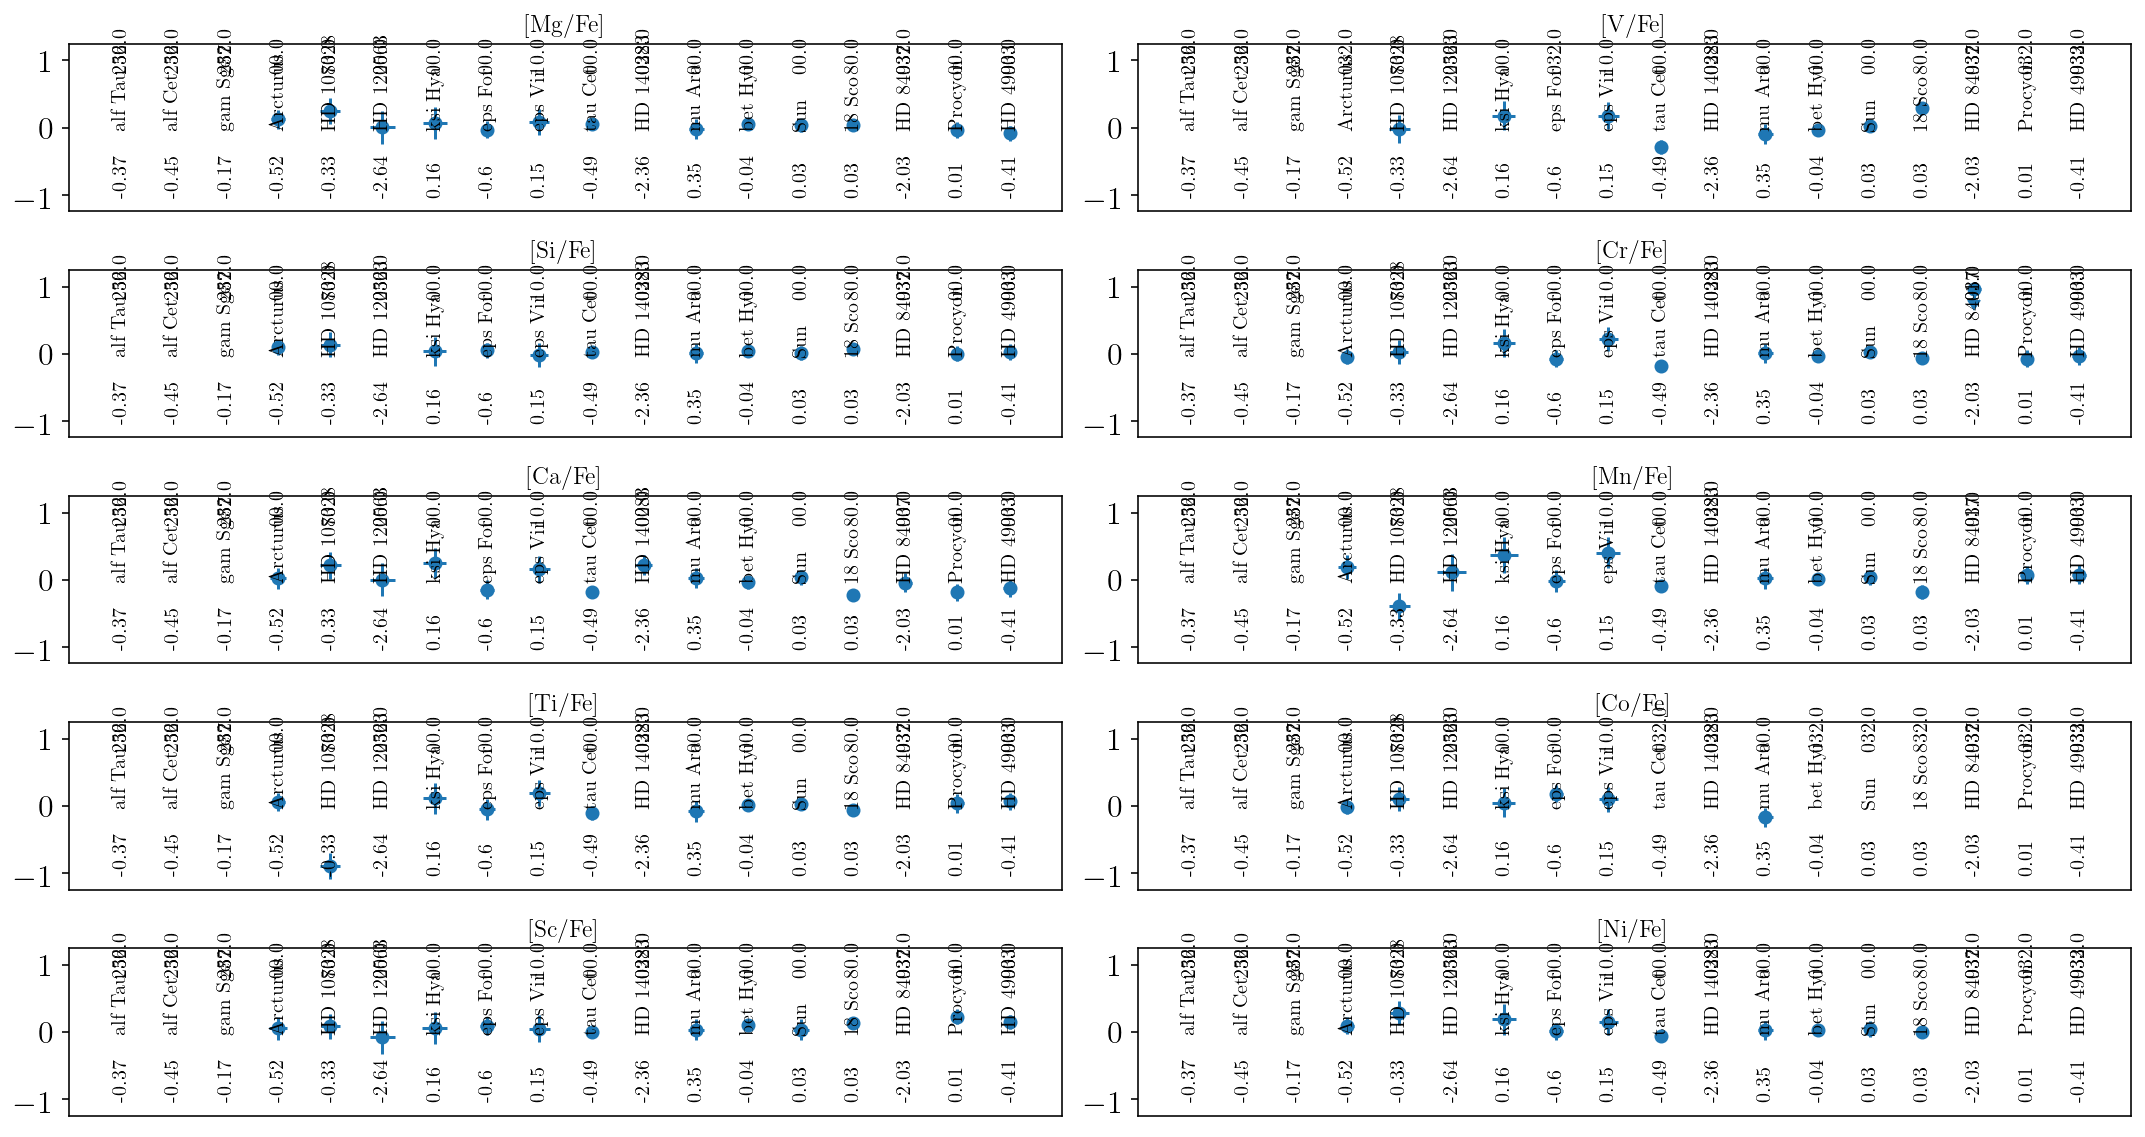

In [6]:
f, gs = plt.subplots(5,2,figsize=(15,8))

for each_ind, each_elem in enumerate(['Mg','Si','Ca','Ti','Sc','V','Cr','Mn','Co','Ni']):
    a_x_gbs = gbs['logeps_'+each_elem+'_']
    e_a_x_gbs = gbs['e_logeps_'+each_elem+'_']
    
    if each_elem == 'Fe':
        x_h_gbs = gbs['__Fe_H_'][gbs_galah_match]
        e_x_h_gbs = gbs['e__Fe_H_'][gbs_galah_match]
        x_h_galah = galah['fe_h'][galah_gbs_match]
        e_x_h_galah = galah['e_fe_h'][galah_gbs_match]

    else:
        x_h_gbs = gbs['__'+each_elem+'_H_'][gbs_galah_match]
        e_x_h_gbs = gbs['e__'+each_elem+'_H_'][gbs_galah_match]
        x_h_galah = galah[each_elem+'_fe'][galah_gbs_match] + galah['fe_h'][galah_gbs_match]
        e_x_h_galah = galah['e_'+each_elem+'_fe'][galah_gbs_match]

        x_fe_gbs = x_h_gbs - gbs['__Fe_H_'][gbs_galah_match]
        e_x_fe_gbs = np.sqrt(e_x_h_gbs**2 + gbs['e__Fe_H_'][gbs_galah_match]**2)
        x_fe_galah = galah[each_elem+'_fe'][galah_gbs_match]
        e_x_fe_galah = galah['e_'+each_elem+'_fe'][galah_gbs_match]
        
        e_x_fe_galah[(galah['flag_'+each_elem+'_fe'][galah_gbs_match] == 1)] = 0.1
        e_x_h_galah[(galah['flag_'+each_elem+'_fe'][galah_gbs_match] == 1)] = 0.1
    
    kwargs = dict(fmt='o',barsabove=True)
    if each_ind < 5:
        ax2 = gs[each_ind,0]
    else:
        ax2 = gs[each_ind-5,1]

    ax2.set_ylim(-1.25,1.25)
    ax2.set_xlim(-1,len(x_h_gbs))

    flag_ab = np.array([x for x in galah['flag_'+each_elem+'_fe'][galah_gbs_match]],dtype=float)
    flag_ab[flag_ab<0] = np.nan
    
    for each_index, each_id in enumerate(gbs['StarID1'][gbs_galah_match]):
        ax2.text(each_index,-1,gbs['__Fe_H_'][gbs_galah_match][each_index],rotation=90,ha='center')

    if each_elem != 'Fe':
        ax2.errorbar(
            np.arange(len(x_fe_gbs)),
            x_fe_galah-x_fe_gbs,
            xerr=e_x_fe_gbs,
            yerr=np.sqrt(e_x_fe_gbs**2+e_x_fe_galah**2),
            uplims=np.array(galah['flag_'+each_elem+'_fe'][galah_gbs_match]),
            **kwargs)
        ax2.set_title('['+each_elem+'/Fe]')
        ax2.set_ylim(-1.25,1.25)
        for each_index, each_id in enumerate(gbs['StarID1'][gbs_galah_match]):
            ax2.text(each_index,0,each_id,rotation=90,ha='center')
            ax2.text(each_index,0.85,galah['flag_sp'][galah_gbs_match][each_index],rotation=90,ha='center')
            ax2.text(each_index,1,flag_ab[each_index],rotation=90,ha='center')

        ax2.set_xticks([])
        #ax2.set_ylabel(r'$\Delta$ GALAH-GBS')
    plt.tight_layout()
    plt.savefig('../../../dr3_release_paper/figures/gbs_performance_abundances.png',bbox_inches='tight',dpi=200)

In [ ]:
for each_elem in ['Mg','Si','Ca','Ti','Sc','V','Cr','Mn','Co','Ni']:
    #a_x_gbs = gbs['logeps_'+each_elem+'_']
    #e_a_x_gbs = gbs['e_logeps_'+each_elem+'_']
    
    if each_elem == 'Fe':
        x_h_gbs = gbs['__Fe_H_'][gbs_galah_match]
        e_x_h_gbs = gbs['e__Fe_H_'][gbs_galah_match]
        x_h_galah = galah['fe_h'][galah_gbs_match]
        e_x_h_galah = galah['e_fe_h'][galah_gbs_match]

    else:
        x_h_gbs = gbs['__'+each_elem+'_H_'][gbs_galah_match]
        e_x_h_gbs = gbs['e__'+each_elem+'_H_'][gbs_galah_match]
        x_h_galah = galah[each_elem+'_fe'][galah_gbs_match] + galah['fe_h'][galah_gbs_match]
        e_x_h_galah = galah['e_'+each_elem+'_fe'][galah_gbs_match]

        x_fe_gbs = x_h_gbs - gbs['__Fe_H_'][gbs_galah_match]
        e_x_fe_gbs = np.sqrt(e_x_h_gbs**2 + gbs['e__Fe_H_'][gbs_galah_match]**2)
        x_fe_galah = galah[each_elem+'_fe'][galah_gbs_match]
        e_x_fe_galah = galah['e_'+each_elem+'_fe'][galah_gbs_match]
        
        e_x_fe_galah[(galah['flag_'+each_elem+'_fe'][galah_gbs_match] == 1)] = 0.1
        e_x_h_galah[(galah['flag_'+each_elem+'_fe'][galah_gbs_match] == 1)] = 0.1
    
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
    kwargs = dict(fmt='o',barsabove=True)
    ax1.errorbar(
        np.arange(len(x_h_gbs)),
        x_h_galah-x_h_gbs,
        xerr=e_x_h_gbs,
        yerr=np.sqrt(e_x_h_gbs**2+e_x_h_galah**2),
        uplims=np.array(galah['flag_'+each_elem+'_fe'][galah_gbs_match]),

        **kwargs)
    ax1.set_title('['+each_elem+'/H]')
    
    ax1.set_ylim(-1.25,1.25)
    ax2.set_ylim(-1.25,1.25)
    ax1.set_xlim(-1,len(x_h_gbs))
    ax2.set_xlim(-1,len(x_h_gbs))

    flag_ab = np.array([x for x in galah['flag_'+each_elem+'_fe'][galah_gbs_match]],dtype=float)
    flag_ab[flag_ab<0] = np.nan
    
    for each_index, each_id in enumerate(gbs['StarID1'][gbs_galah_match]):
        ax1.text(each_index,0,each_id,rotation=90,ha='center')
        ax1.text(each_index,-1,gbs['Teff'][gbs_galah_match][each_index],rotation=90,ha='center')
        ax2.text(each_index,-1,gbs['__Fe_H_'][gbs_galah_match][each_index],rotation=90,ha='center')
        ax1.text(each_index,0.85,galah['flag_sp'][galah_gbs_match][each_index],rotation=90,ha='center')
        ax1.text(each_index,1,flag_ab[each_index],rotation=90,ha='center')

    if each_elem != 'Fe':
        ax2.errorbar(
            np.arange(len(x_fe_gbs)),
            x_fe_galah-x_fe_gbs,
            xerr=e_x_fe_gbs,
            yerr=np.sqrt(e_x_fe_gbs**2+e_x_fe_galah**2),
            uplims=np.array(galah['flag_'+each_elem+'_fe'][galah_gbs_match]),
            **kwargs)
        ax2.set_title('['+each_elem+'/Fe]')
        ax2.set_ylim(-1.25,1.25)
        for each_index, each_id in enumerate(gbs['StarID1'][gbs_galah_match]):
            ax2.text(each_index,0,each_id,rotation=90,ha='center')
            ax2.text(each_index,0.85,galah['flag_sp'][galah_gbs_match][each_index],rotation=90,ha='center')
            ax2.text(each_index,1,flag_ab[each_index],rotation=90,ha='center')

        ax1.set_xticks([])
        ax2.set_xticks([])
        ax1.set_ylabel(r'$\Delta$ GALAH-GBS')
        ax2.set_ylabel(r'$\Delta$ GALAH-GBS')
    plt.tight_layout()

print('Explanation:')
print('Left panel: [X/H] difference for GBS (GALAH-GBS)')
print('Left panel: [X/Fe] difference for GBS (GALAH-GBS)')
print('Bottom annotation Teff (left) and [Fe/H] (right)')
print('upper numbers give flag_elem_fe (top) and flag_sp (below)')
print('upper limits indicated with arrow rather than errorbar')